In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [2]:
def ReLU(preactivation):
  activation = np.clip(preactivation, 0, None)

  return activation

In [3]:
def heavside(preactivation):
    activation = []
    for i in range(len(preactivation)):
        if preactivation[i] < 0:
            activation.append(0.0)
        elif preactivation[i]>= 0:
            activation.append(1.0)
    return np.array(activation)

In [4]:
def rect(preactivation):
    activation = []
    for i in range(len(preactivation)):
        if preactivation[i] < 0:
            activation.append(0.0)
        elif preactivation[i]> 1:
            activation.append(0.0)
        elif 0 <= preactivation[i] <= 1:
            activation.append(1.0)
    return np.array(activation)

In [5]:
def tanhact(preactivation):
    activation = np.tanh(preactivation)
    return activation

In [6]:
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Replace the lines below to compute the three initial lines
  # (figure 3.3a-c) from the theta parameters.  These are the preactivations
  pre_1 = x * theta_11 + theta_10
  pre_2 = x * theta_21 + theta_20
  pre_3 = x * theta_31 + theta_30

  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.3 g-i
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # TODO Replace the code below to combining the weighted activations and add
  # phi_0 to create the output as in figure 3.3 j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [7]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,2]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$')
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,2]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

In [8]:
# Now lets define some parameters and run the neural network
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9  ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66

# Define a range of input values
x = np.arange(0,2,0.01)

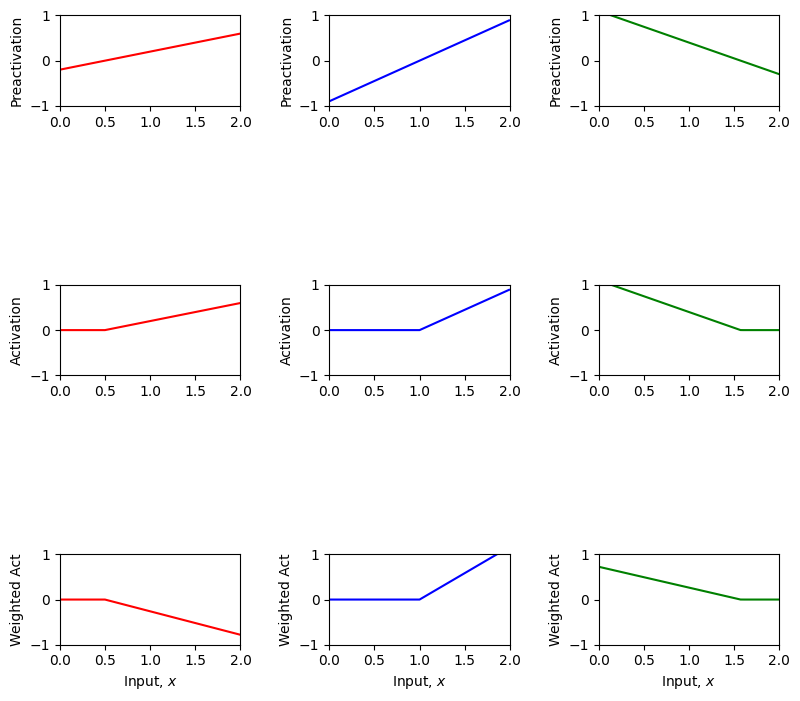

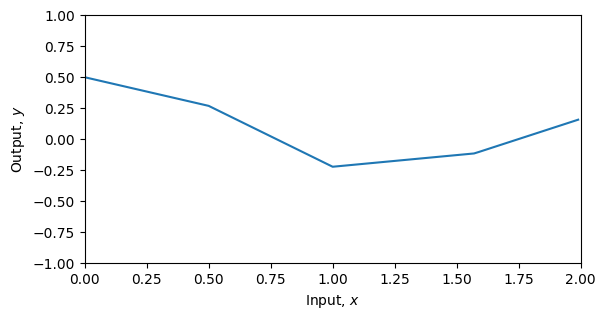

In [9]:
# We run the neural network for each of these input values ReLU
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

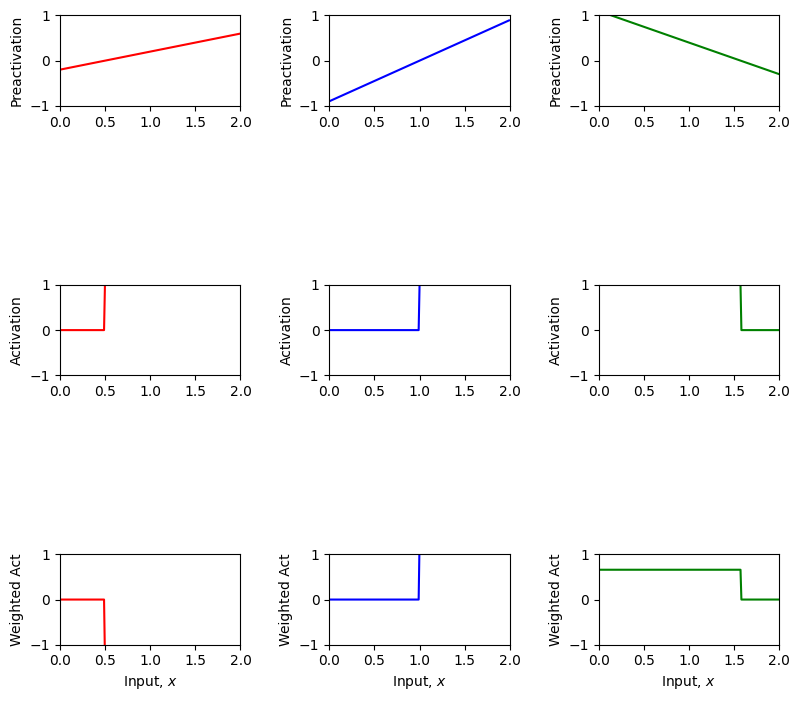

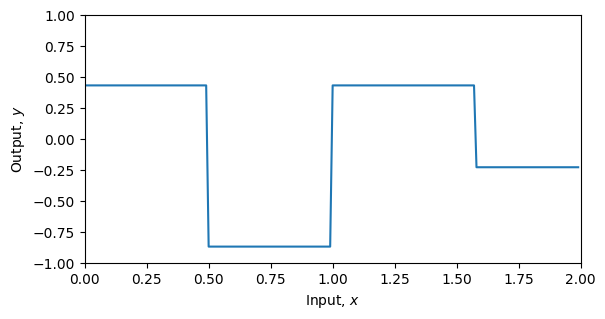

In [10]:
# We run the neural network for each of these input values HEAVSIDE
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, heavside, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

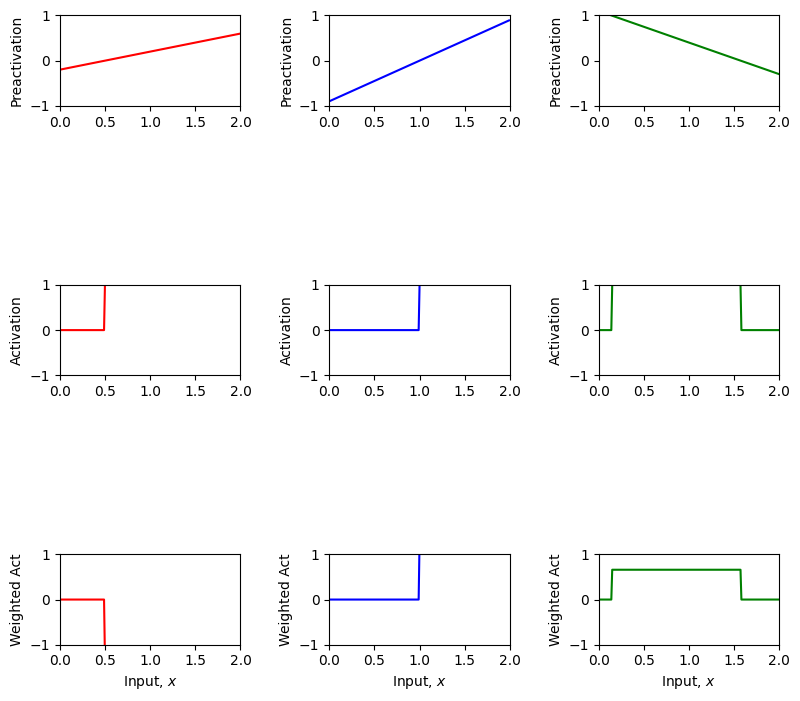

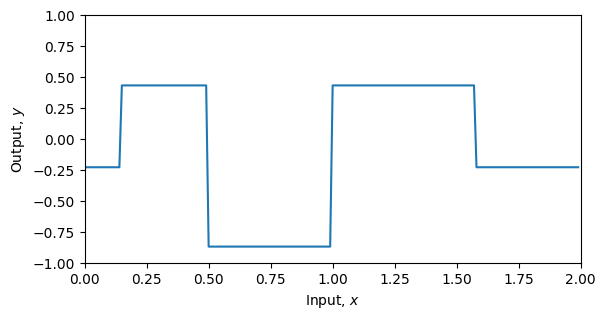

In [11]:
# We run the neural network for each of these input values RECT
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, rect, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

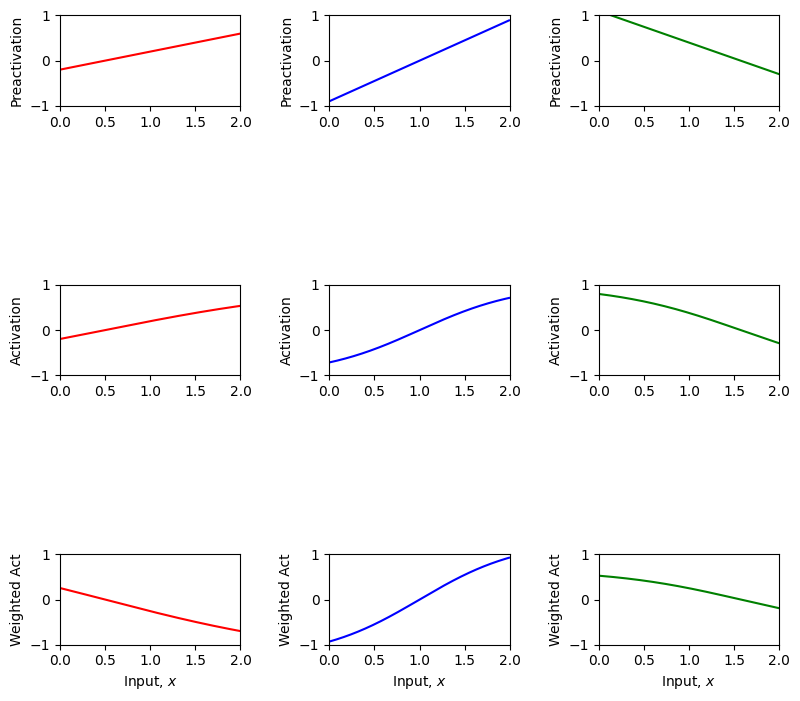

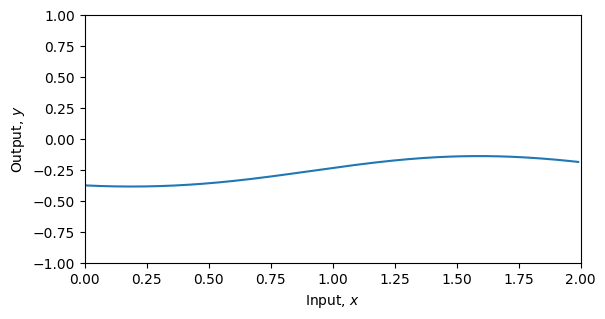

In [12]:
# We run the neural network for each of these input values TANH
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, tanhact, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [13]:
# Now lets define some parameters and run the neural network
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9  ; theta_21 = 0.9
theta_30 = -1.1  ; theta_31 = 0.65
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66

# Define a range of input values
x = np.arange(0,2,0.01)

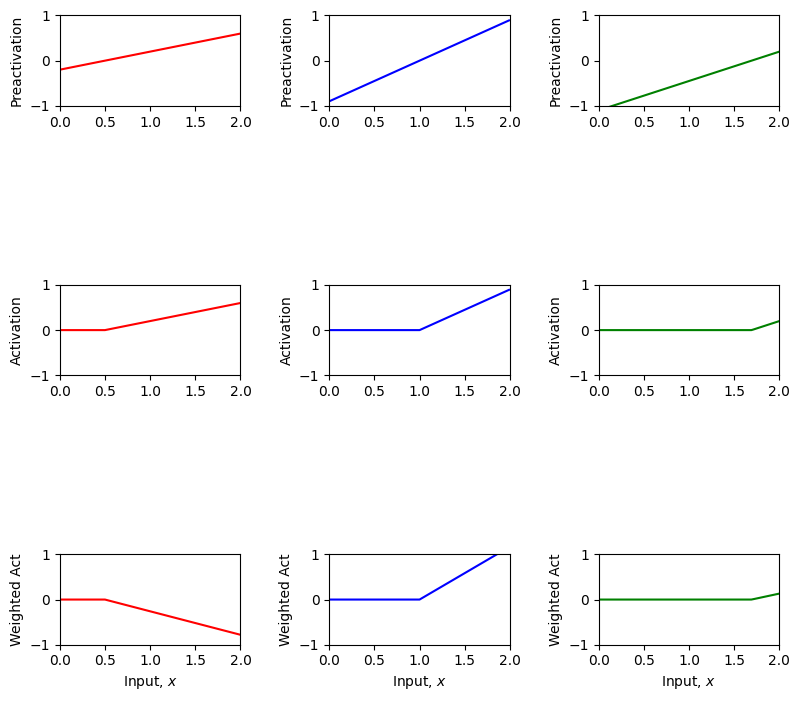

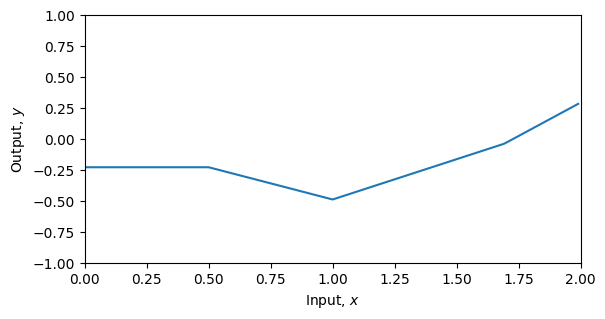

In [14]:
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [19]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural2(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,2]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$')
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_aspect(1)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

In [21]:
# Now lets define some parameters and run the neural network
theta_10 =  0 ; theta_11 = 1
theta_20 = -0.3  ; theta_21 = 0.5
theta_30 = -0.3  ; theta_31 = 1
phi_0 = 0; phi_1 = 1; phi_2 = 1.3; phi_3 = 0.66

# Define a range of input values
x = np.arange(0,2,0.01)

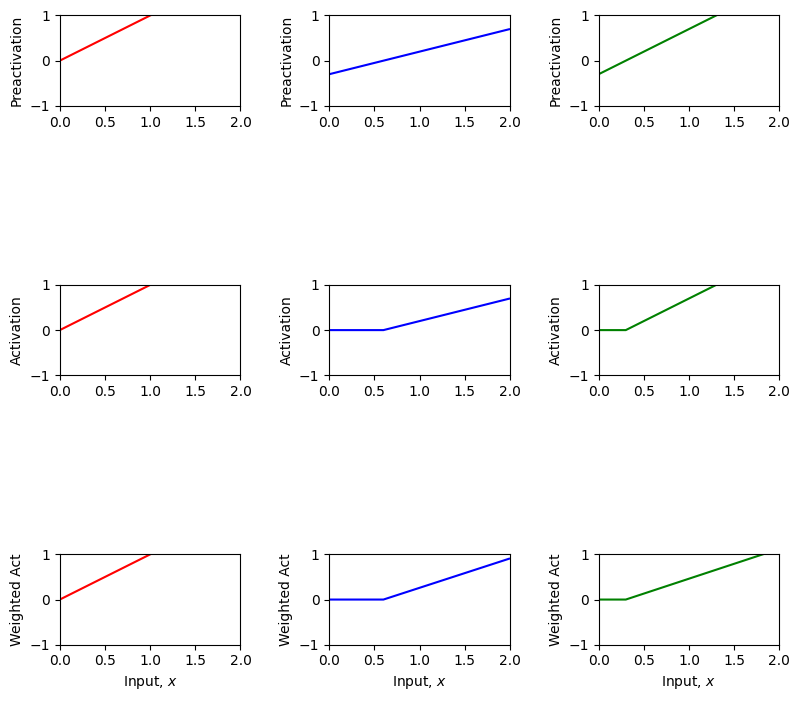

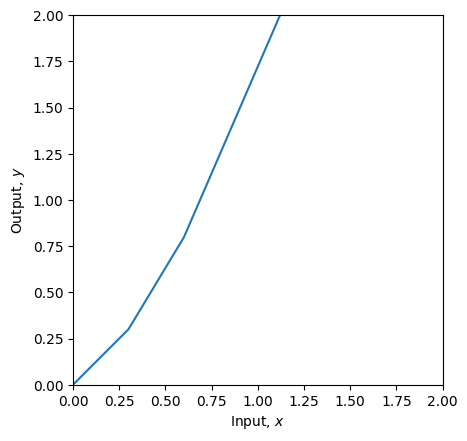

In [22]:
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural2(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [68]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural3(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$')
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([0,1])
  ax.set_aspect(1)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

In [85]:
# Now lets define some parameters and run the neural network
theta_10 =  -1/6 ; theta_11 = 1
theta_20 = -2/6  ; theta_21 = 1
theta_30 = 4/6  ; theta_31 = -1
phi_0 = 4; phi_1 = -12; phi_2 = 9; phi_3 = -6

# Define a range of input values
x = np.arange(0,2,0.01)

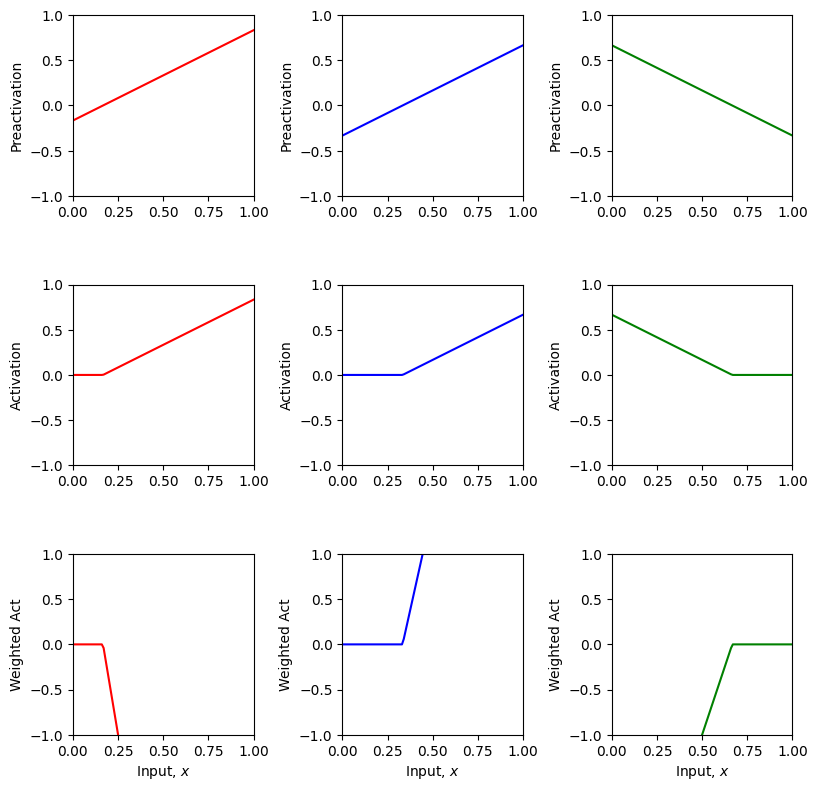

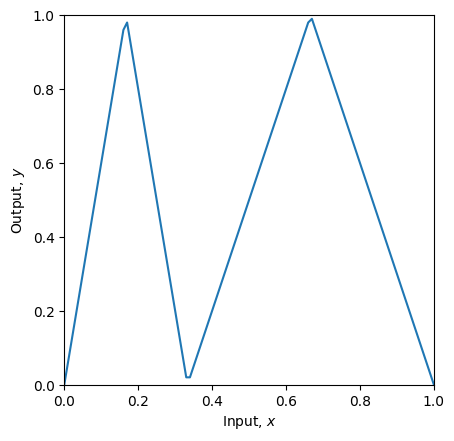

In [86]:
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural3(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [9]:
def sig(x):
    return 1/(1+np.exp(-x))

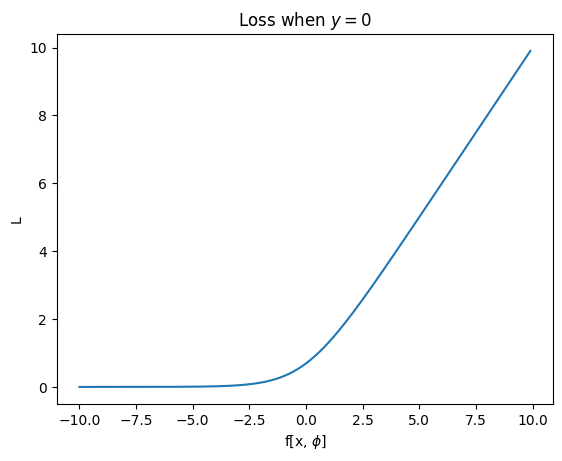

In [16]:
elem_x = np.arange(-10, 10, 0.1)
sig_e = []
for i in elem_x:
    sig_e.append(sig(i))
sig_e = np.array(sig_e)
elem_y_0 = -np.log(1-sig_e)

plt.plot(elem_x, elem_y_0)
plt.xlabel('f[x, $\phi$]')
plt.ylabel('L')
plt.title('Loss when $y=0$')
plt.show()

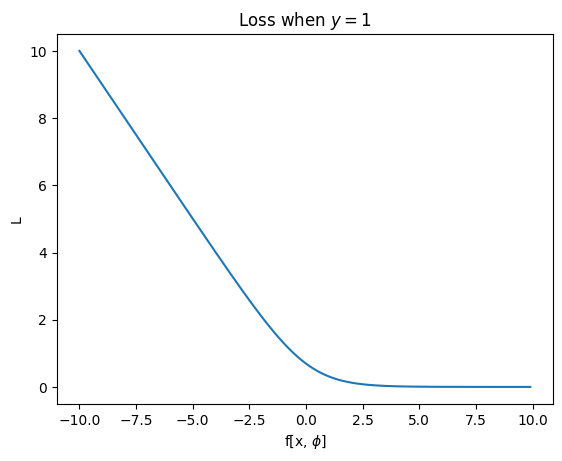

In [17]:
elem_x = np.arange(-10, 10, 0.1)
sig_e = []
for i in elem_x:
    sig_e.append(sig(i))
sig_e = np.array(sig_e)

elem_y_0 = -np.log(sig_e)

plt.plot(elem_x, elem_y_0)
plt.xlabel('f[x, $\phi$]')
plt.ylabel('L')
plt.title('Loss when $y=1$')
plt.show()